# Stock Analysis Using Time Series

We shall analyse  stock for the time period of 10 years between 01-01-2010 and 12-07-2021.

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
amzn=yf.download("AMZN",start="2010-01-01",close="2021-07-12",interval="3mo")
aapl=yf.download("AAPL",start="2010-01-01",close="2021-07-12",interval="3mo")
goog=yf.download("GOOG",start="2010-01-01",close="2021-07-12",interval="3mo")
msft=yf.download("MSFT",start="2010-01-01",close="2021-07-12",interval="3mo")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
#removing NaN values

amzn.dropna(inplace=True)
aapl.dropna(inplace=True)
goog.dropna(inplace=True)
msft.dropna(inplace=True)

Text(0.5, 1.0, 'Closing prices of AMZN')

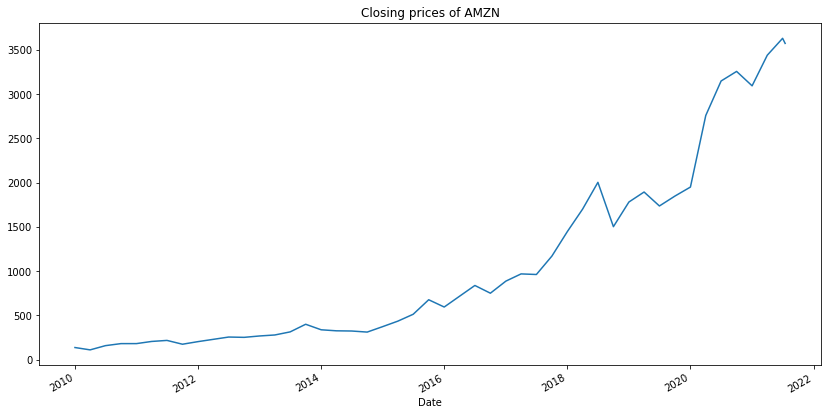

In [5]:
amzn.Close.plot(figsize=(14, 7))
plt.title("Closing prices of AMZN")

Text(0.5, 1.0, 'Closing prices of AAPL')

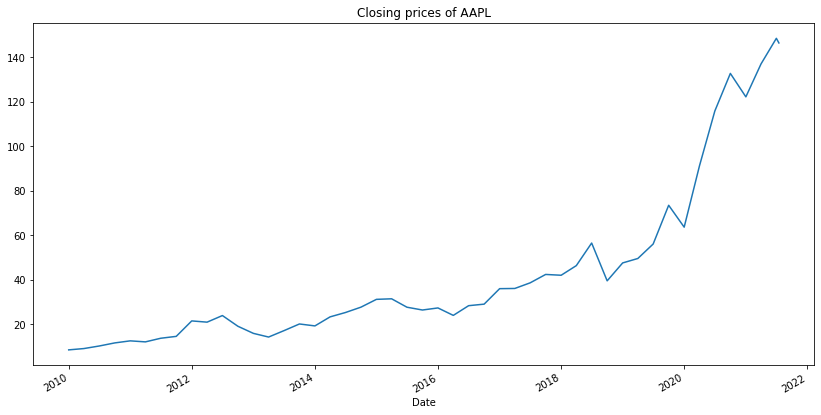

In [6]:
aapl.Close.plot(figsize=(14, 7),label="AAPL")
plt.title("Closing prices of AAPL")

Text(0.5, 1.0, 'Closing prices of MSFT')

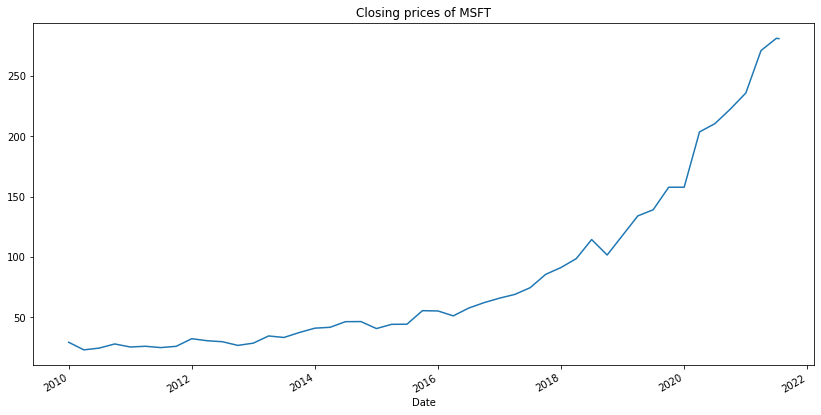

In [7]:
msft.Close.plot(figsize=(14, 7),label="MSFT")
plt.title("Closing prices of MSFT")

Text(0.5, 1.0, 'Closing prices of GOOG')

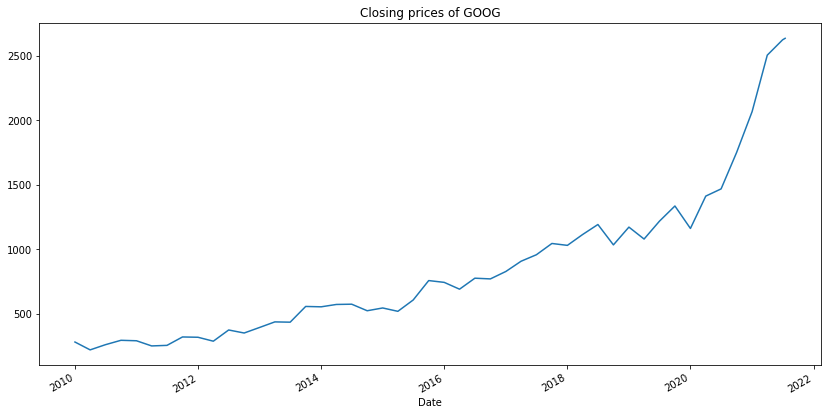

In [8]:
goog.Close.plot(figsize=(14, 7),label="GOOG")
plt.title("Closing prices of GOOG")

# Testing Stationarity for Each Stock

In [9]:
#function to test for staionarity

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of ADF test")
    #adft = timeseriesadfuller(timeseries,autolag='AIC')
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

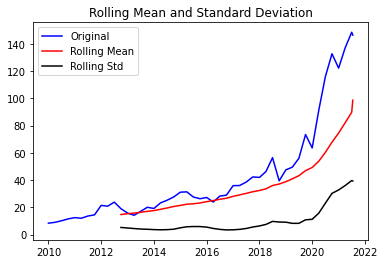

Results of ADF test
Test Statistics                 3.432258
p-value                         1.000000
No. of lags used                8.000000
Number of observations used    39.000000
critical value (1%)            -3.610400
critical value (5%)            -2.939109
critical value (10%)           -2.608063
dtype: float64


In [10]:
#testing for stationarity for aapl

aapl_close = aapl['Close']
test_stationarity(aapl_close)

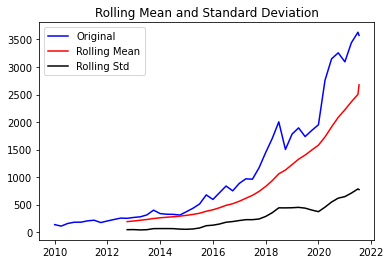

Results of ADF test
Test Statistics                 2.369998
p-value                         0.998995
No. of lags used                9.000000
Number of observations used    38.000000
critical value (1%)            -3.615509
critical value (5%)            -2.941262
critical value (10%)           -2.609200
dtype: float64


In [11]:
#testing for stationarity for amzn

amzn_close = amzn['Close']
test_stationarity(amzn_close)

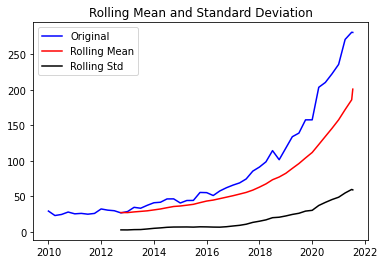

Results of ADF test
Test Statistics                 2.888744
p-value                         1.000000
No. of lags used                7.000000
Number of observations used    40.000000
critical value (1%)            -3.605565
critical value (5%)            -2.937069
critical value (10%)           -2.606986
dtype: float64


In [12]:
#testing for stationarity for msft

msft_close=msft['Close']
test_stationarity(msft_close)

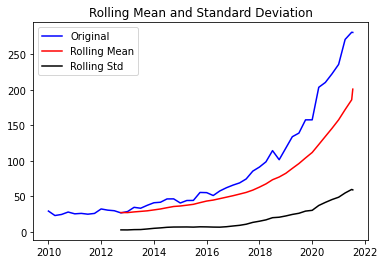

Results of ADF test
Test Statistics                 2.888744
p-value                         1.000000
No. of lags used                7.000000
Number of observations used    40.000000
critical value (1%)            -3.605565
critical value (5%)            -2.937069
critical value (10%)           -2.606986
dtype: float64


In [13]:
#testing for stationarity for goog

goog_close=msft['Close']
test_stationarity(goog_close)

Conclusion: None of the stocks have constant mean and standard deviation, thus they are not stationary.

# Moving Averages 

In [14]:
#moving average on the closing prices

aapl.loc[:, 'ma20'] = aapl.Close.rolling(20).mean()
aapl.loc[:, 'ma200'] = aapl.Close.rolling(200).mean()

amzn.loc[:, 'ma20'] = amzn.Close.rolling(20).mean()
amzn.loc[:, 'ma200'] = amzn.Close.rolling(200).mean()

msft.loc[:, 'ma20'] = msft.Close.rolling(20).mean()
msft.loc[:, 'ma200'] = msft.Close.rolling(200).mean()

goog.loc[:, 'ma20'] = goog.Close.rolling(20).mean()
goog.loc[:, 'ma200'] = goog.Close.rolling(200).mean()


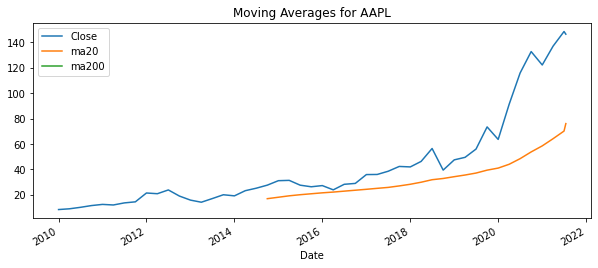

In [15]:
#plotting the MAs and closing prices (aapl)

aapl[["Close", "ma20", "ma200"]].plot(figsize=(10, 4))

plt.title("Moving Averages for AAPL")
plt.show()

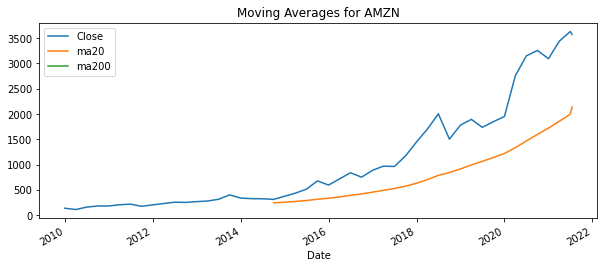

In [16]:
#plotting the MAs and closing prices (amzn)

amzn[["Close", "ma20", "ma200"]].plot(figsize=(10, 4))

plt.title("Moving Averages for AMZN")
plt.show()

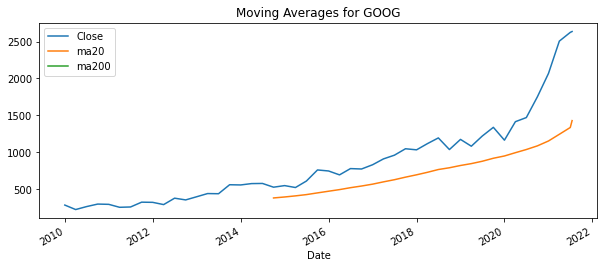

In [17]:
#plotting the MAs and closing prices (goog)

goog[["Close", "ma20", "ma200"]].plot(figsize=(10, 4))

plt.title("Moving Averages for GOOG")
plt.show()

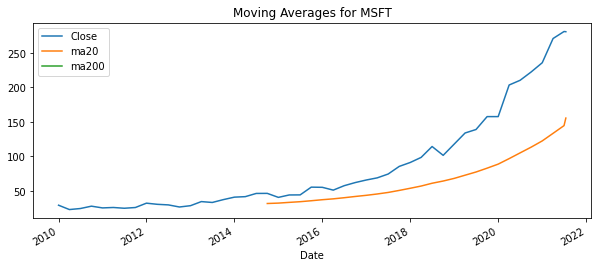

In [18]:
#plotting the MAs and closing prices (msft)

msft[["Close", "ma20", "ma200"]].plot(figsize=(10, 4))

plt.title("Moving Averages for MSFT")
plt.show()

# Rolling Averages

No handles with labels found to put in legend.


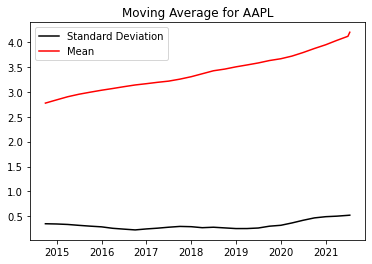

In [19]:
#finding the rolling average after taking the log of the series (apple)
#taking input for the past 5 months and giving a mean consumption value at every point further ahead in series.
aapl_log = np.log(aapl_close)
moving_avg = aapl_log.rolling(20).mean()
std_dev_aapl = aapl_log.rolling(20).std()
plt.legend(loc='best')
plt.title('Moving Average for AAPL')
plt.plot(std_dev_aapl, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


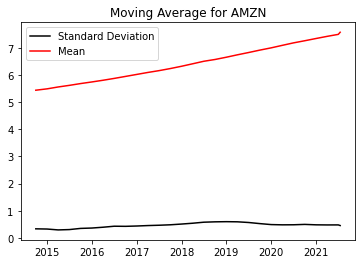

In [20]:
#finding the rolling average after taking the log of the series (amzn)
#taking input for the past 5 months and giving a mean consumption value at every point further ahead in series.
amzn_log = np.log(amzn_close)
moving_avg = amzn_log.rolling(20).mean()
std_dev_amzn = amzn_log.rolling(20).std()
plt.legend(loc='best')
plt.title('Moving Average for AMZN')
plt.plot(std_dev_amzn, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


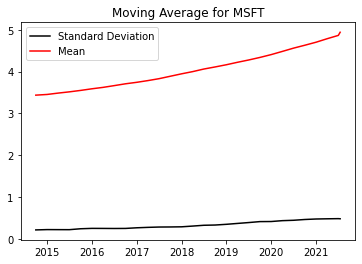

In [21]:
#finding the rolling average after taking the log of the series (msft)
#taking input for the past 5 months and giving a mean consumption value at every point further ahead in series.
msft_log = np.log(msft_close)
moving_avg = msft_log.rolling(20).mean()
std_dev_msft = msft_log.rolling(20).std()
plt.legend(loc='best')
plt.title('Moving Average for MSFT')
plt.plot(std_dev_msft, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


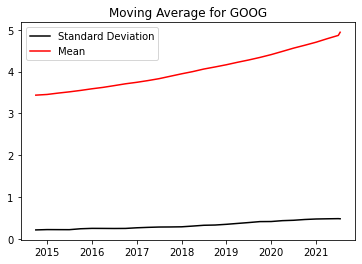

In [22]:
#finding the rolling average after taking the log of the series (goog)
#taking input for the past 5 months and giving a mean consumption value at every point further ahead in series.
goog_log = np.log(goog_close)
moving_avg = goog_log.rolling(20).mean()
std_dev_goog = goog_log.rolling(20).std()
plt.legend(loc='best')
plt.title('Moving Average for GOOG')
plt.plot(std_dev_goog, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

#Creating an ARIMA Model
We're going to split the data into test and training set

In [24]:
aapl_Dates=aapl.index

In [25]:
#aapl

train_data, test_data = aapl[0:int(len(aapl)*0.8)], aapl[int(len(aapl)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))
print('Mean Absolute Percentage Error: '+str(mape*100))

Testing Mean Squared Error is 426.7379130292502
Mean Absolute Percentage Error: 44.67137663313099


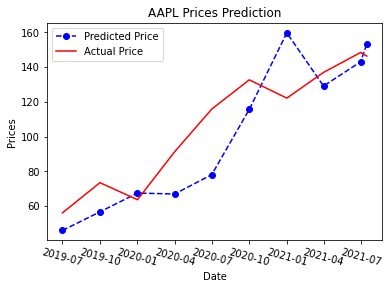

In [26]:
#plotting predictions for aapl

test_set_range = aapl[int(len(aapl)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('AAPL Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), aapl.Date[881:1259:50])

#plt.xticks(np.arange(100,1250,75), aapl.Date[100:1250:75])

#plt.xticks(aapl[int(len(aapl)*0.8):].index, np.arange(100, 701, 75))

plt.xticks(rotation=-15)

plt.legend()
plt.show()

In [27]:
#amzn

train_data, test_data = amzn[0:int(len(amzn)*0.8)], amzn[int(len(amzn)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))
print('Mean Absolute Percentage Error: '+str(mape*100))

Testing Mean Squared Error is 124169.16493582958
Mean Absolute Percentage Error: 31.010925252881332


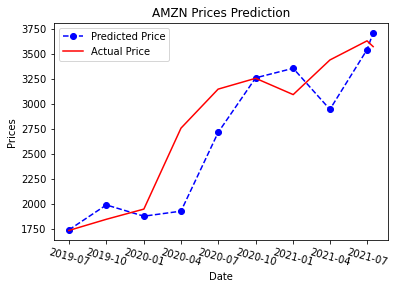

In [28]:
#plotting predictions for amzn

test_set_range = amzn[int(len(amzn)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('AMZN Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), amzn.Date[881:1259:50])

#plt.xticks(np.arange(100,1250,75), amzn.Date[100:1250:75])

#plt.xticks(amzn[int(len(amzn)*0.8):].index, np.arange(100, 701, 75))

plt.xticks(rotation=-15)

plt.legend()
plt.show()

In [29]:
#msft

train_data, test_data = msft[0:int(len(msft)*0.8)], msft[int(len(msft)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))
print('Mean Absolute Percentage Error: '+str(mape*100))

Testing Mean Squared Error is 312.678005182879
Mean Absolute Percentage Error: 30.061426872790424


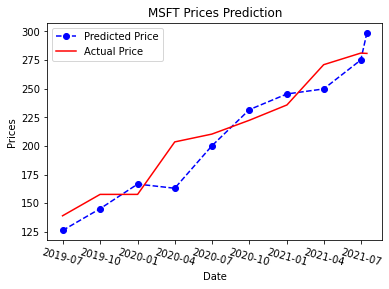

In [30]:
#plotting predictions for msft

test_set_range = msft[int(len(msft)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('MSFT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), msft.Date[881:1259:50])

#plt.xticks(np.arange(100,1250,75), msft.Date[100:1250:75])

#plt.xticks(msft[int(len(msft)*0.8):].index, np.arange(100, 701, 75))

plt.xticks(rotation=-15)

plt.legend()
plt.show()

In [31]:
#goog

train_data, test_data = goog[0:int(len(goog)*0.8)], goog[int(len(goog)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))
print('Mean Absolute Percentage Error: '+str(mape*100))

Testing Mean Squared Error is 58732.059400493126
Mean Absolute Percentage Error: 37.34566387676765


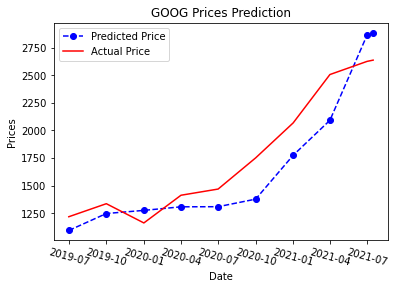

In [32]:
#plotting predictions for goog

test_set_range = goog[int(len(goog)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('GOOG Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), goog.Date[881:1259:50])

#plt.xticks(np.arange(100,1250,75), goog.Date[100:1250:75])

#plt.xticks(goog[int(len(goog)*0.8):].index, np.arange(100, 701, 75))

plt.xticks(rotation=-15)

plt.legend()
plt.show()